In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv('mouseready_df.csv', delimiter=',')

In [3]:
def do_stat(i, test_y, test_X, m, frr_sr, far_sr, eer_sr, accuracy_sr, precision_sr, recall_sr, F1_sr):
    #print(confusion_matrix(test_y, m.predict(test_X)))
    tp = confusion_matrix(test_y, m.predict(test_X))[0,0]
    fp = confusion_matrix(test_y, m.predict(test_X))[0,1]
    fn = confusion_matrix(test_y, m.predict(test_X))[1,0]
    tn = confusion_matrix(test_y, m.predict(test_X))[1,1]
    frr = fn/(tp+fn)
    frr_sr += frr
    far = fp/(tp+fp)
    far_sr += far
    eer = (frr+far)/2
    eer_sr += eer
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    accuracy_sr += accuracy
    precision = tp/(tp+fp)
    precision_sr += precision
    recall = tp/(tp+fn)
    recall_sr += recall
    f1 = 2 * (precision * recall) / (precision + recall)
    F1_sr += f1
    print(i)
    print('frr = ' + str(round(frr, 3)))
    print('far = ' + str(round(far, 3)))
    print('eer = ' + str(round(eer, 3)))
    print('accuracy = ' + str(round(accuracy, 3)))
    print('precision = ' + str(round(precision, 3)))
    print('recall = ' + str(round(recall, 3)))
    print('f1 = ' + str(round(f1, 3)))
    # plot ROC Curve
    fpr, tpr, thresholds = roc_curve(test_y, m.predict_proba(test_X)[:,1])
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('AUC-ROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    return list([frr_sr, far_sr, eer_sr, accuracy_sr, precision_sr, recall_sr, F1_sr])
        
def do_avg_stat(frr_sr, far_sr, eer_sr, accuracy_sr, precision_sr, recall_sr, F1_sr, count):
    frr_sr = frr_sr/count
    far_sr = far_sr/count
    eer_sr = eer_sr/count
    accuracy_sr = accuracy_sr/count
    precision_sr = precision_sr/count
    recall_sr = recall_sr/count
    F1_sr = F1_sr/count
    print('frr_sr = ' + str(round(frr_sr, 3)))
    print('far_sr = ' + str(round(far_sr, 3)))
    print('eer_sr = ' + str(round(eer_sr, 3)))
    print('accuracy_sr = ' + str(round(accuracy_sr, 3)))
    print('precision_sr = ' + str(round(precision_sr, 3)))
    print('recall_sr = ' + str(round(recall_sr, 3)))
    print('F1_sr = ' + str(round(F1_sr, 3)))

# LogisticRegression

In [33]:
def logistic_reg(dataframe, count):
    stat = [0.0000] * 7
    for i in range(1,count+1):
        model = LogisticRegression()
        LR = dataframe.sample(frac=1).reset_index(drop=True)
        #X = np.array(LR[['time', 'DU', 'DU3', 'DU4', 'DU5', 'kpm5', 'kpm10',
       #'skew5_time', 'skew20_time', 'skew5_kpm5', 'skew10_kpm5', 'skew5_kpm10',
       #'skew10_kpm10']].values)
        X = np.array(LR[['time', 'kpm5', 'skew5_time', 'skew5_kpm10']].values)
        #X = np.array(LR[['time']].values)
        y = np.array(LR['y'].values)
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20)
        m = model.fit(train_X, train_y)
        print(confusion_matrix(test_y, m.predict(test_X)))
        stat = do_stat(i, test_y, test_X, m, stat[0], stat[1], stat[2], stat[3], stat[4], stat[5], stat[6])
    do_avg_stat(stat[0], stat[1], stat[2], stat[3], stat[4], stat[5], stat[6], count)

[[45 13]
 [29 14]]
1
frr = 0.392
far = 0.224
eer = 0.308
accuracy = 0.584
precision = 0.776
recall = 0.608
f1 = 0.682


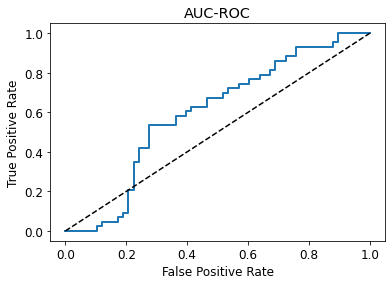

[[54 12]
 [28  7]]
2
frr = 0.341
far = 0.182
eer = 0.262
accuracy = 0.604
precision = 0.818
recall = 0.659
f1 = 0.73


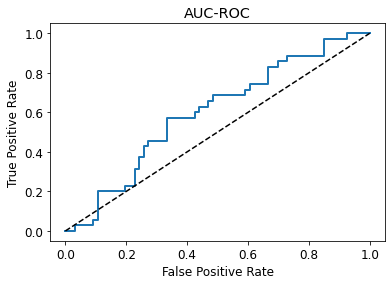

[[55  7]
 [31  8]]
3
frr = 0.36
far = 0.113
eer = 0.237
accuracy = 0.624
precision = 0.887
recall = 0.64
f1 = 0.743


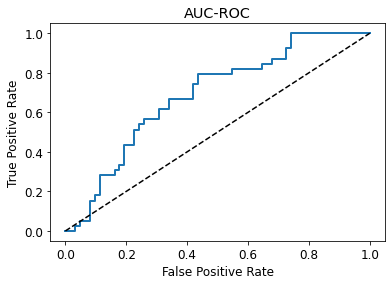

[[52  3]
 [40  6]]
4
frr = 0.435
far = 0.055
eer = 0.245
accuracy = 0.574
precision = 0.945
recall = 0.565
f1 = 0.707


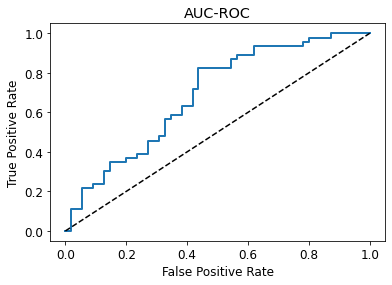

[[53 11]
 [30  7]]
5
frr = 0.361
far = 0.172
eer = 0.267
accuracy = 0.594
precision = 0.828
recall = 0.639
f1 = 0.721


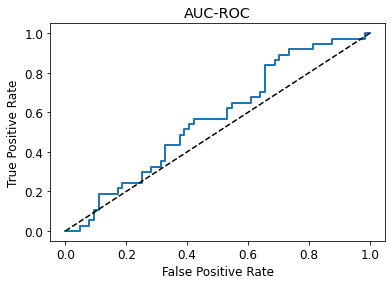

[[61  7]
 [26  7]]
6
frr = 0.299
far = 0.103
eer = 0.201
accuracy = 0.673
precision = 0.897
recall = 0.701
f1 = 0.787


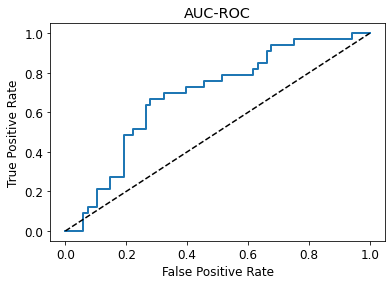

[[49 10]
 [33  9]]
7
frr = 0.402
far = 0.169
eer = 0.286
accuracy = 0.574
precision = 0.831
recall = 0.598
f1 = 0.695


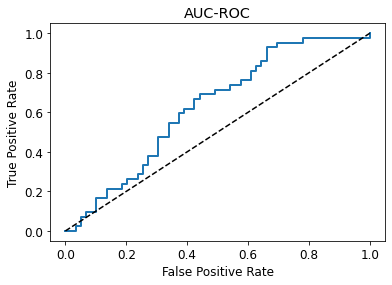

[[50 16]
 [24 11]]
8
frr = 0.324
far = 0.242
eer = 0.283
accuracy = 0.604
precision = 0.758
recall = 0.676
f1 = 0.714


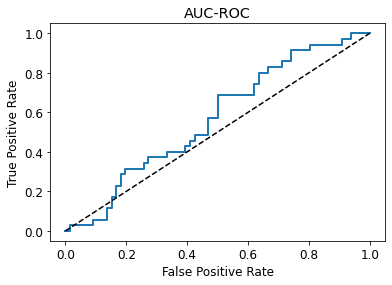

[[47 10]
 [37  7]]
9
frr = 0.44
far = 0.175
eer = 0.308
accuracy = 0.535
precision = 0.825
recall = 0.56
f1 = 0.667


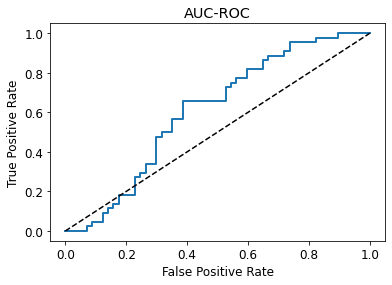

[[51  8]
 [30 12]]
10
frr = 0.37
far = 0.136
eer = 0.253
accuracy = 0.624
precision = 0.864
recall = 0.63
f1 = 0.729


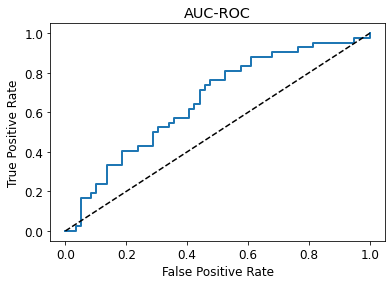

[[49 16]
 [29  7]]
11
frr = 0.372
far = 0.246
eer = 0.309
accuracy = 0.554
precision = 0.754
recall = 0.628
f1 = 0.685


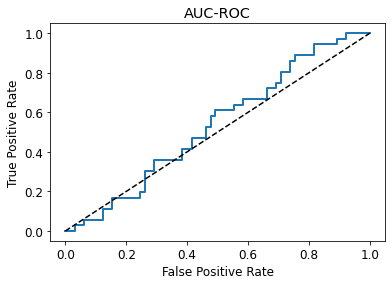

[[53  6]
 [34  8]]
12
frr = 0.391
far = 0.102
eer = 0.246
accuracy = 0.604
precision = 0.898
recall = 0.609
f1 = 0.726


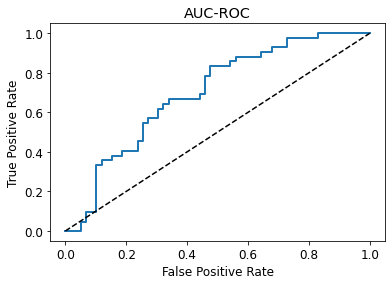

[[57  5]
 [32  7]]
13
frr = 0.36
far = 0.081
eer = 0.22
accuracy = 0.634
precision = 0.919
recall = 0.64
f1 = 0.755


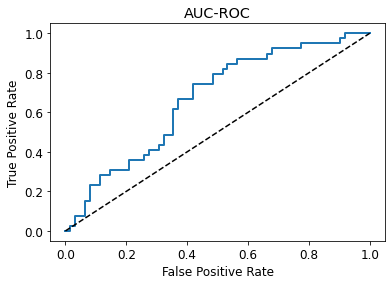

[[54  9]
 [31  7]]
14
frr = 0.365
far = 0.143
eer = 0.254
accuracy = 0.604
precision = 0.857
recall = 0.635
f1 = 0.73


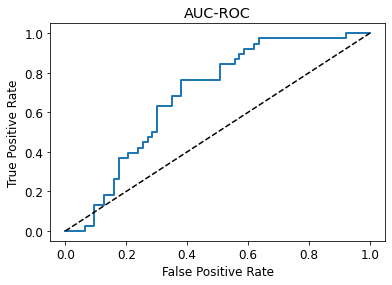

[[58 10]
 [24  9]]
15
frr = 0.293
far = 0.147
eer = 0.22
accuracy = 0.663
precision = 0.853
recall = 0.707
f1 = 0.773


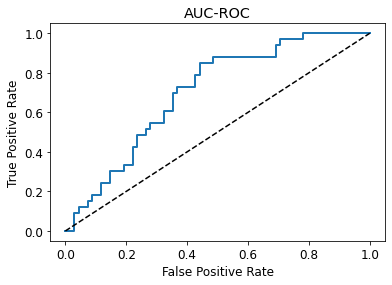

[[49 14]
 [31  7]]
16
frr = 0.388
far = 0.222
eer = 0.305
accuracy = 0.554
precision = 0.778
recall = 0.612
f1 = 0.685


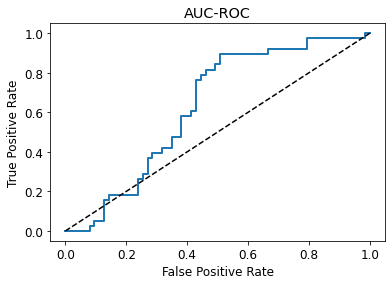

[[56  6]
 [31  8]]
17
frr = 0.356
far = 0.097
eer = 0.227
accuracy = 0.634
precision = 0.903
recall = 0.644
f1 = 0.752


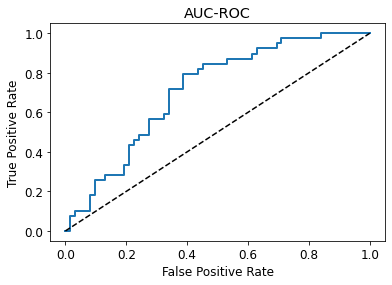

[[56  8]
 [28  9]]
18
frr = 0.333
far = 0.125
eer = 0.229
accuracy = 0.644
precision = 0.875
recall = 0.667
f1 = 0.757


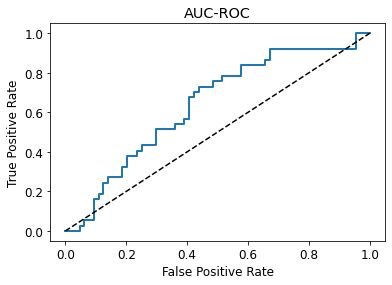

[[52  7]
 [35  7]]
19
frr = 0.402
far = 0.119
eer = 0.26
accuracy = 0.584
precision = 0.881
recall = 0.598
f1 = 0.712


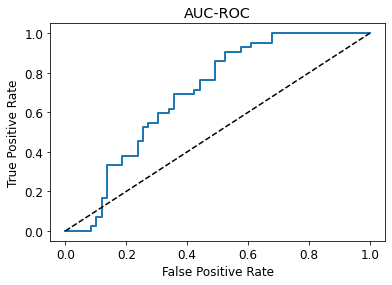

[[56  8]
 [28  9]]
20
frr = 0.333
far = 0.125
eer = 0.229
accuracy = 0.644
precision = 0.875
recall = 0.667
f1 = 0.757


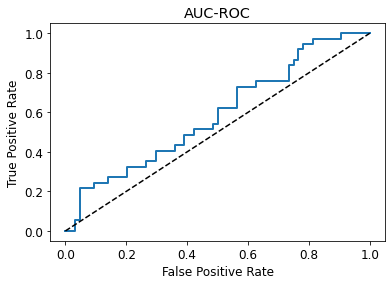

frr_sr = 0.366
far_sr = 0.149
eer_sr = 0.257
accuracy_sr = 0.605
precision_sr = 0.851
recall_sr = 0.634
F1_sr = 0.725


In [34]:
logistic_reg(df, 20)

# kNN

## Определим k

In [6]:
X = np.array(df[['time', 'DU', 'DU3', 'DU4', 'DU5', 'kpm5', 'kpm10',
       'skew5_time', 'skew20_time', 'skew5_kpm5', 'skew10_kpm5', 'skew5_kpm10',
       'skew10_kpm10']].values)
y = np.array(df['y'].values)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30)

In [7]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(train_X,train_y)
    
    train_scores.append(knn.score(train_X,train_y))
    test_scores.append(knn.score(test_X,test_y))

In [8]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [9]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 70.19867549668875 % and k = [3, 13]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


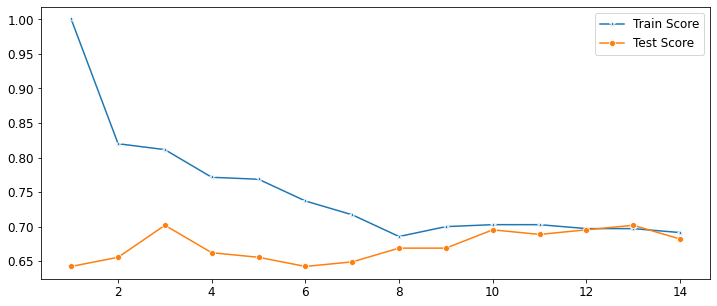

In [10]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [12]:
def knn(dataframe, count, k):
    stat = [0.0000] * 7
    for i in range(1,count+1):
        model = KNeighborsClassifier(k)
        df_mix = dataframe.sample(frac=1).reset_index(drop=True)
        X = np.array(df_mix[['time', 'DU', 'DU3', 'DU4', 'DU5', 'kpm5', 'kpm10',
       'skew5_time', 'skew20_time', 'skew5_kpm5', 'skew10_kpm5', 'skew5_kpm10',
       'skew10_kpm10']].values)
        y = np.array(df_mix['y'].values)
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20)
        m = model.fit(train_X, train_y)
        print(confusion_matrix(test_y, m.predict(test_X)))
        stat = do_stat(i, test_y, test_X, m, stat[0], stat[1], stat[2], stat[3], stat[4], stat[5], stat[6])
    do_avg_stat(stat[0], stat[1], stat[2], stat[3], stat[4], stat[5], stat[6], count)

[[49 13]
 [21 18]]
1
frr = 0.3
far = 0.21
eer = 0.255
accuracy = 0.663
precision = 0.79
recall = 0.7
f1 = 0.742


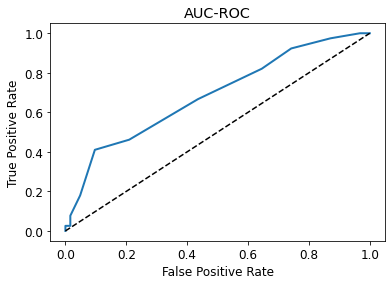

[[45 16]
 [19 21]]
2
frr = 0.297
far = 0.262
eer = 0.28
accuracy = 0.653
precision = 0.738
recall = 0.703
f1 = 0.72


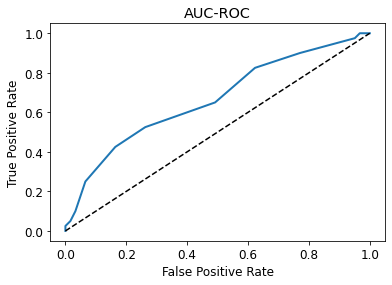

[[46 23]
 [15 17]]
3
frr = 0.246
far = 0.333
eer = 0.29
accuracy = 0.624
precision = 0.667
recall = 0.754
f1 = 0.708


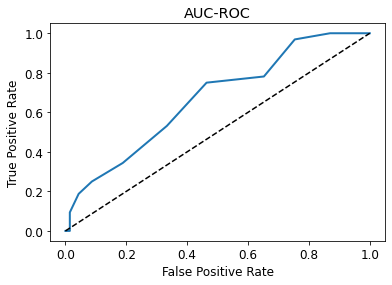

[[52 14]
 [17 18]]
4
frr = 0.246
far = 0.212
eer = 0.229
accuracy = 0.693
precision = 0.788
recall = 0.754
f1 = 0.77


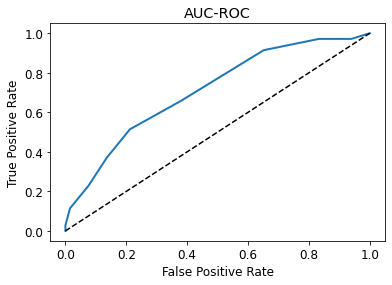

[[42 19]
 [24 16]]
5
frr = 0.364
far = 0.311
eer = 0.338
accuracy = 0.574
precision = 0.689
recall = 0.636
f1 = 0.661


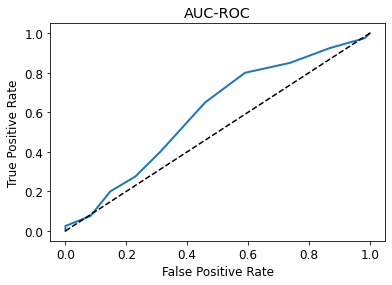

[[48 16]
 [21 16]]
6
frr = 0.304
far = 0.25
eer = 0.277
accuracy = 0.634
precision = 0.75
recall = 0.696
f1 = 0.722


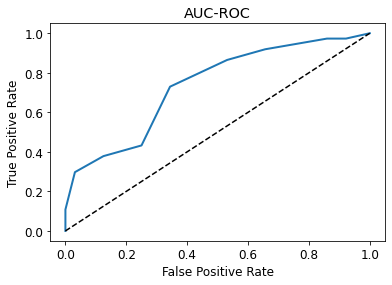

[[50 16]
 [23 12]]
7
frr = 0.315
far = 0.242
eer = 0.279
accuracy = 0.614
precision = 0.758
recall = 0.685
f1 = 0.719


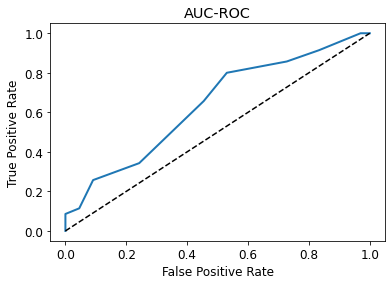

[[38 24]
 [20 19]]
8
frr = 0.345
far = 0.387
eer = 0.366
accuracy = 0.564
precision = 0.613
recall = 0.655
f1 = 0.633


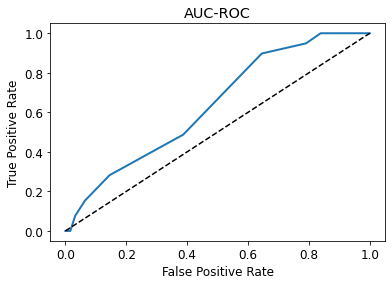

[[44 16]
 [15 26]]
9
frr = 0.254
far = 0.267
eer = 0.26
accuracy = 0.693
precision = 0.733
recall = 0.746
f1 = 0.739


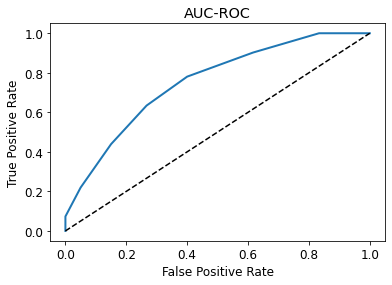

[[46 21]
 [15 19]]
10
frr = 0.246
far = 0.313
eer = 0.28
accuracy = 0.644
precision = 0.687
recall = 0.754
f1 = 0.719


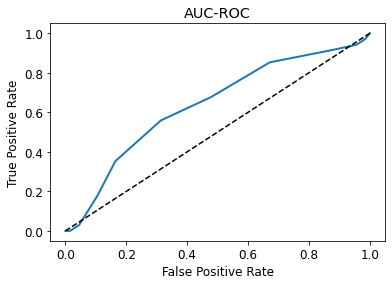

[[44  8]
 [33 16]]
11
frr = 0.429
far = 0.154
eer = 0.291
accuracy = 0.594
precision = 0.846
recall = 0.571
f1 = 0.682


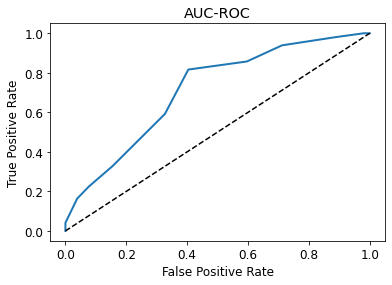

[[47 18]
 [19 17]]
12
frr = 0.288
far = 0.277
eer = 0.282
accuracy = 0.634
precision = 0.723
recall = 0.712
f1 = 0.718


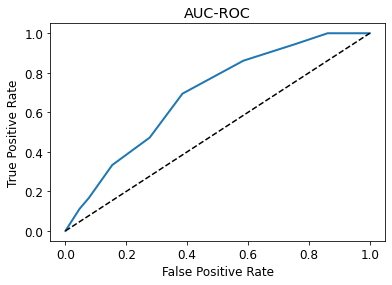

[[50 15]
 [20 16]]
13
frr = 0.286
far = 0.231
eer = 0.258
accuracy = 0.653
precision = 0.769
recall = 0.714
f1 = 0.741


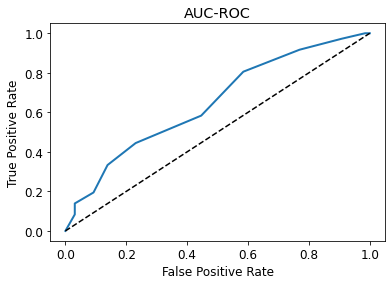

[[43 20]
 [17 21]]
14
frr = 0.283
far = 0.317
eer = 0.3
accuracy = 0.634
precision = 0.683
recall = 0.717
f1 = 0.699


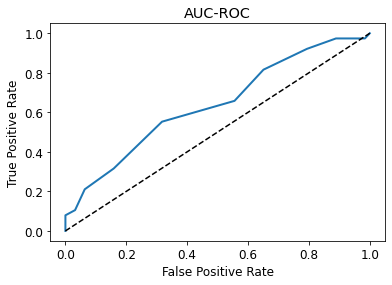

[[46 11]
 [28 16]]
15
frr = 0.378
far = 0.193
eer = 0.286
accuracy = 0.614
precision = 0.807
recall = 0.622
f1 = 0.702


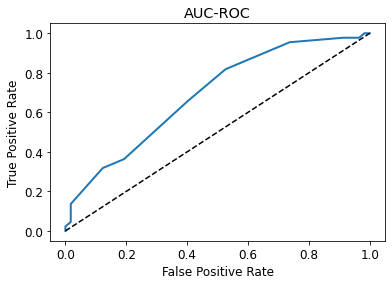

[[47 17]
 [20 17]]
16
frr = 0.299
far = 0.266
eer = 0.282
accuracy = 0.634
precision = 0.734
recall = 0.701
f1 = 0.718


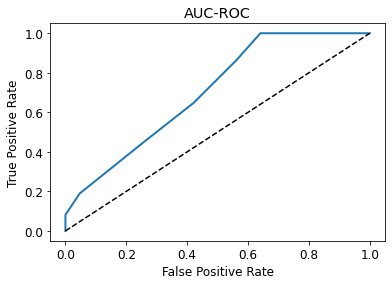

[[48 23]
 [13 17]]
17
frr = 0.213
far = 0.324
eer = 0.269
accuracy = 0.644
precision = 0.676
recall = 0.787
f1 = 0.727


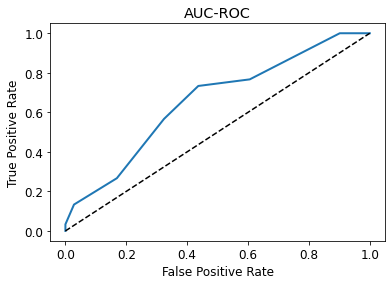

[[40 12]
 [30 19]]
18
frr = 0.429
far = 0.231
eer = 0.33
accuracy = 0.584
precision = 0.769
recall = 0.571
f1 = 0.656


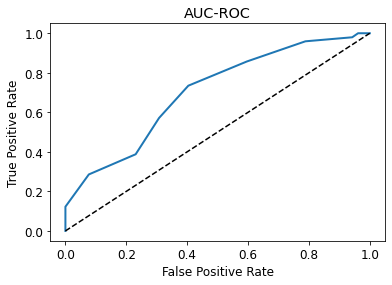

[[50 10]
 [25 16]]
19
frr = 0.333
far = 0.167
eer = 0.25
accuracy = 0.653
precision = 0.833
recall = 0.667
f1 = 0.741


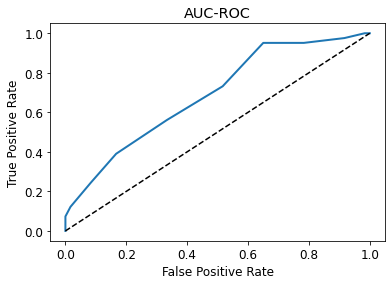

[[45 21]
 [19 16]]
20
frr = 0.297
far = 0.318
eer = 0.308
accuracy = 0.604
precision = 0.682
recall = 0.703
f1 = 0.692


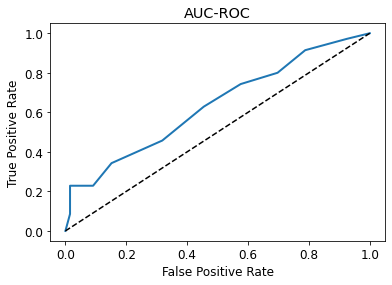

frr_sr = 0.308
far_sr = 0.263
eer_sr = 0.285
accuracy_sr = 0.63
precision_sr = 0.737
recall_sr = 0.692
F1_sr = 0.711


In [13]:
knn(df, 20, 13)

# SVM

In [14]:
def svm_rbf(dataframe, C):
    frr_sr = 0.0000
    far_sr = 0.0000
    eer_sr = 0.0000
    accuracy_sr = 0.0000
    precision_sr = 0.0000
    recall_sr = 0.000
    F1_sr = 0.0000  
    for i in range(1,21):
        m=SVC(C=C)
        LR = dataframe.sample(frac=1).reset_index(drop=True)
        #X = np.array(dataframe.iloc[:, :-2].values)
        X = np.array(LR[['time', 'DU', 'DU3', 'DU4', 'DU5', 'kpm5', 'kpm10',
       'skew5_time', 'skew20_time', 'skew5_kpm5', 'skew10_kpm5', 'skew5_kpm10',
       'skew10_kpm10']].values)
        y = np.array(LR['y'].values)
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20)
        m.fit(train_X,train_y)
        print(confusion_matrix(test_y, m.predict(test_X)))
        tp = confusion_matrix(test_y, m.predict(test_X))[0,0]
        fp = confusion_matrix(test_y, m.predict(test_X))[0,1]
        fn = confusion_matrix(test_y, m.predict(test_X))[1,0]
        tn = confusion_matrix(test_y, m.predict(test_X))[1,1]
        frr = fn/(tp+fn)
        frr_sr += frr
        far = fp/(tp+fp)
        far_sr += far
        eer = (frr+far)/2
        eer_sr += eer
        accuracy = (tp+tn)/(tp+tn+fp+fn)
        accuracy_sr += accuracy
        precision = tp/(tp+fp)
        precision_sr += precision
        recall = tp/(tp+fn)
        recall_sr += recall
        f1 = 2 * (precision * recall) / (precision + recall)
        F1_sr += f1
        print(i)
        print('frr = ' + str(round(frr, 3)))
        print('far = ' + str(round(far, 3)))
        print('eer = ' + str(round(eer, 3)))
        print('accuracy = ' + str(round(accuracy, 3)))
        print('precision = ' + str(round(precision, 3)))
        print('recall = ' + str(round(recall, 3)))
        print('f1 = ' + str(round(f1, 3)))
    frr_sr = frr_sr/20
    far_sr = far_sr/20
    eer_sr = eer_sr/20
    accuracy_sr = accuracy_sr/20
    precision_sr = precision_sr/20
    recall_sr = recall_sr/20
    F1_sr = F1_sr/20
    print('frr_sr = ' + str(round(frr_sr, 3)))
    print('far_sr = ' + str(round(far_sr, 3)))
    print('eer_sr = ' + str(round(eer_sr, 3)))
    print('accuracy_sr = ' + str(round(accuracy_sr, 3)))
    print('precision_sr = ' + str(round(precision_sr, 3)))
    print('recall_sr = ' + str(round(recall_sr, 3)))
    print('F1_sr = ' + str(round(F1_sr, 3)))

In [15]:
svm_rbf(df, 100.00)

[[49 11]
 [18 23]]
1
frr = 0.269
far = 0.183
eer = 0.226
accuracy = 0.713
precision = 0.817
recall = 0.731
f1 = 0.772
[[51 15]
 [13 22]]
2
frr = 0.203
far = 0.227
eer = 0.215
accuracy = 0.723
precision = 0.773
recall = 0.797
f1 = 0.785
[[37 27]
 [13 24]]
3
frr = 0.26
far = 0.422
eer = 0.341
accuracy = 0.604
precision = 0.578
recall = 0.74
f1 = 0.649
[[42 24]
 [17 18]]
4
frr = 0.288
far = 0.364
eer = 0.326
accuracy = 0.594
precision = 0.636
recall = 0.712
f1 = 0.672
[[43 16]
 [14 28]]
5
frr = 0.246
far = 0.271
eer = 0.258
accuracy = 0.703
precision = 0.729
recall = 0.754
f1 = 0.741
[[40 18]
 [21 22]]
6
frr = 0.344
far = 0.31
eer = 0.327
accuracy = 0.614
precision = 0.69
recall = 0.656
f1 = 0.672
[[55 15]
 [16 15]]
7
frr = 0.225
far = 0.214
eer = 0.22
accuracy = 0.693
precision = 0.786
recall = 0.775
f1 = 0.78
[[46 14]
 [14 27]]
8
frr = 0.233
far = 0.233
eer = 0.233
accuracy = 0.723
precision = 0.767
recall = 0.767
f1 = 0.767
[[53 11]
 [20 17]]
9
frr = 0.274
far = 0.172
eer = 0.223
accur

In [16]:
def svm_linear(dataframe, C):
    frr_sr = 0.0000
    far_sr = 0.0000
    eer_sr = 0.0000
    accuracy_sr = 0.0000
    precision_sr = 0.0000
    recall_sr = 0.000
    F1_sr = 0.0000  
    for i in range(1,21):
        m=SVC(kernel='linear', C=C, probability=True)
        LR = dataframe.sample(frac=1).reset_index(drop=True)
        #X = np.array(dataframe.iloc[:, :-2].values)
        X = np.array(LR[['time', 'DU', 'DU3', 'DU4', 'DU5', 'kpm5', 'kpm10',
       'skew5_time', 'skew20_time', 'skew5_kpm5', 'skew10_kpm5', 'skew5_kpm10',
       'skew10_kpm10']].values)
        y = np.array(LR['y'].values)
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20)
        m.fit(train_X,train_y)
        print(confusion_matrix(test_y, m.predict(test_X)))
        tp = confusion_matrix(test_y, m.predict(test_X))[0,0]
        fp = confusion_matrix(test_y, m.predict(test_X))[0,1]
        fn = confusion_matrix(test_y, m.predict(test_X))[1,0]
        tn = confusion_matrix(test_y, m.predict(test_X))[1,1]
        frr = fn/(tp+fn)
        frr_sr += frr
        far = fp/(tp+fp)
        far_sr += far
        eer = (frr+far)/2
        eer_sr += eer
        accuracy = (tp+tn)/(tp+tn+fp+fn)
        accuracy_sr += accuracy
        precision = tp/(tp+fp)
        precision_sr += precision
        recall = tp/(tp+fn)
        recall_sr += recall
        f1 = 2 * (precision * recall) / (precision + recall)
        F1_sr += f1
        print(i)
        # plot ROC Curve
        fpr, tpr, thresholds = roc_curve(test_y, m.predict_proba(test_X)[:,1])
        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, linewidth=2)
        plt.plot([0,1], [0,1], 'k--' )
        plt.rcParams['font.size'] = 12
        plt.title('AUC-ROC для SVM')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()
        print('frr = ' + str(round(frr, 3)))
        print('far = ' + str(round(far, 3)))
        print('eer = ' + str(round(eer, 3)))
        print('accuracy = ' + str(round(accuracy, 3)))
        print('precision = ' + str(round(precision, 3)))
        print('recall = ' + str(round(recall, 3)))
        print('f1 = ' + str(round(f1, 3)))
    frr_sr = frr_sr/20
    far_sr = far_sr/20
    eer_sr = eer_sr/20
    accuracy_sr = accuracy_sr/20
    precision_sr = precision_sr/20
    recall_sr = recall_sr/20
    F1_sr = F1_sr/20
    print('frr_sr = ' + str(round(frr_sr, 3)))
    print('far_sr = ' + str(round(far_sr, 3)))
    print('eer_sr = ' + str(round(eer_sr, 3)))
    print('accuracy_sr = ' + str(round(accuracy_sr, 3)))
    print('precision_sr = ' + str(round(precision_sr, 3)))
    print('recall_sr = ' + str(round(recall_sr, 3)))
    print('F1_sr = ' + str(round(F1_sr, 3)))

[[49 12]
 [28 12]]
1


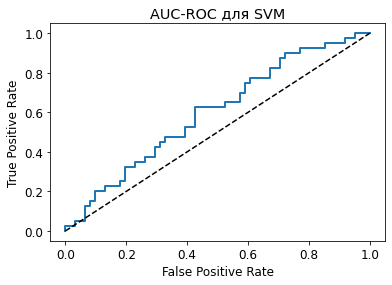

frr = 0.364
far = 0.197
eer = 0.28
accuracy = 0.604
precision = 0.803
recall = 0.636
f1 = 0.71
[[56  0]
 [45  0]]
2


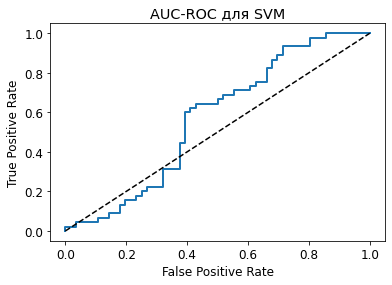

frr = 0.446
far = 0.0
eer = 0.223
accuracy = 0.554
precision = 1.0
recall = 0.554
f1 = 0.713
[[51 16]
 [21 13]]
3


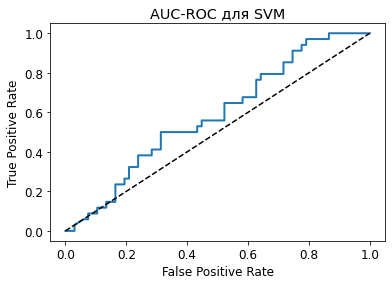

frr = 0.292
far = 0.239
eer = 0.265
accuracy = 0.634
precision = 0.761
recall = 0.708
f1 = 0.734
[[59  0]
 [42  0]]
4


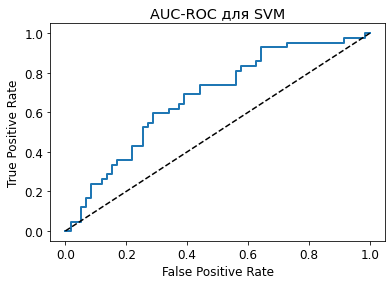

frr = 0.416
far = 0.0
eer = 0.208
accuracy = 0.584
precision = 1.0
recall = 0.584
f1 = 0.737
[[45 16]
 [28 12]]
5


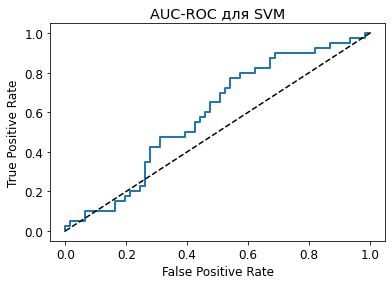

frr = 0.384
far = 0.262
eer = 0.323
accuracy = 0.564
precision = 0.738
recall = 0.616
f1 = 0.672
[[44 23]
 [20 14]]
6


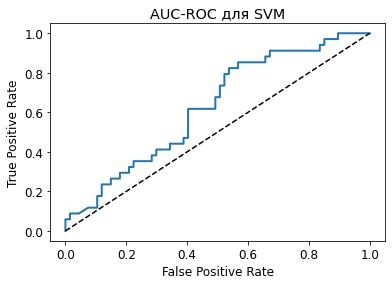

frr = 0.312
far = 0.343
eer = 0.328
accuracy = 0.574
precision = 0.657
recall = 0.688
f1 = 0.672
[[62  0]
 [39  0]]
7


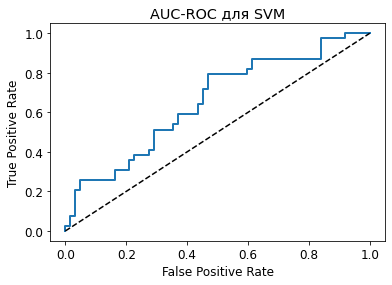

frr = 0.386
far = 0.0
eer = 0.193
accuracy = 0.614
precision = 1.0
recall = 0.614
f1 = 0.761
[[52 22]
 [15 12]]
8


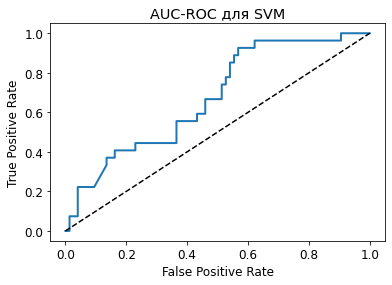

frr = 0.224
far = 0.297
eer = 0.261
accuracy = 0.634
precision = 0.703
recall = 0.776
f1 = 0.738
[[48 18]
 [22 13]]
9


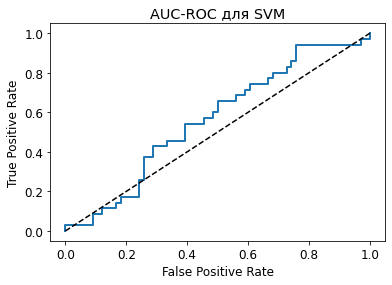

frr = 0.314
far = 0.273
eer = 0.294
accuracy = 0.604
precision = 0.727
recall = 0.686
f1 = 0.706
[[50 18]
 [18 15]]
10


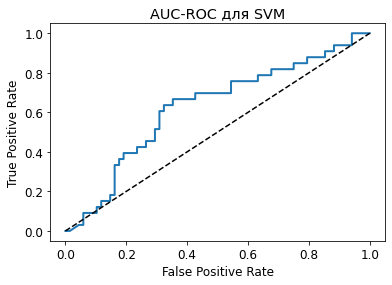

frr = 0.265
far = 0.265
eer = 0.265
accuracy = 0.644
precision = 0.735
recall = 0.735
f1 = 0.735
[[47 19]
 [21 14]]
11


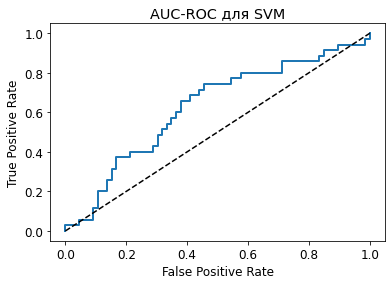

frr = 0.309
far = 0.288
eer = 0.298
accuracy = 0.604
precision = 0.712
recall = 0.691
f1 = 0.701
[[44 19]
 [29  9]]
12


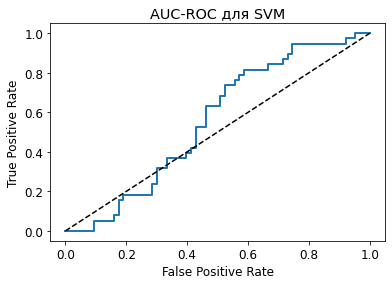

frr = 0.397
far = 0.302
eer = 0.349
accuracy = 0.525
precision = 0.698
recall = 0.603
f1 = 0.647
[[63  0]
 [38  0]]
13


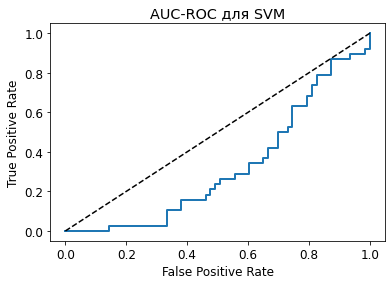

frr = 0.376
far = 0.0
eer = 0.188
accuracy = 0.624
precision = 1.0
recall = 0.624
f1 = 0.768
[[48 22]
 [20 11]]
14


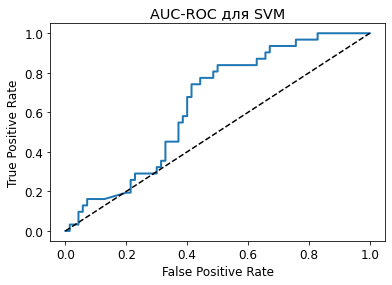

frr = 0.294
far = 0.314
eer = 0.304
accuracy = 0.584
precision = 0.686
recall = 0.706
f1 = 0.696
[[48 17]
 [21 15]]
15


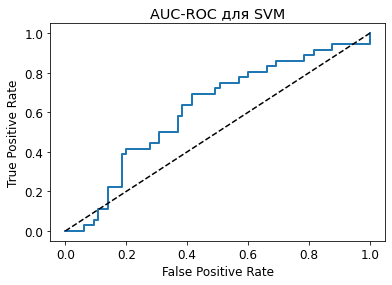

frr = 0.304
far = 0.262
eer = 0.283
accuracy = 0.624
precision = 0.738
recall = 0.696
f1 = 0.716
[[58 18]
 [ 9 16]]
16


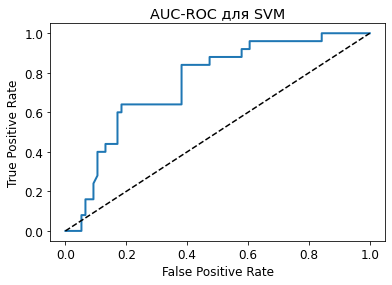

frr = 0.134
far = 0.237
eer = 0.186
accuracy = 0.733
precision = 0.763
recall = 0.866
f1 = 0.811
[[63  0]
 [38  0]]
17


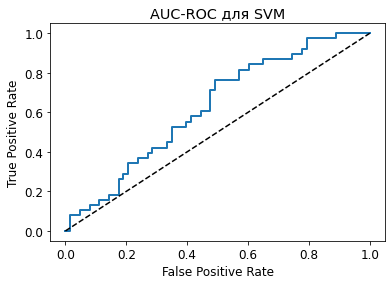

frr = 0.376
far = 0.0
eer = 0.188
accuracy = 0.624
precision = 1.0
recall = 0.624
f1 = 0.768
[[50 15]
 [24 12]]
18


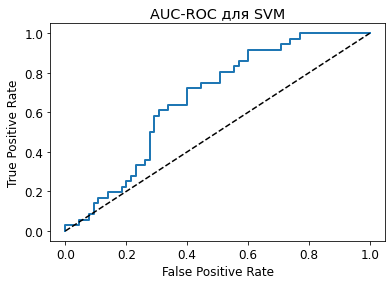

frr = 0.324
far = 0.231
eer = 0.278
accuracy = 0.614
precision = 0.769
recall = 0.676
f1 = 0.719
[[39 29]
 [17 16]]
19


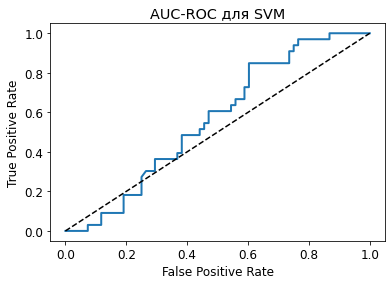

frr = 0.304
far = 0.426
eer = 0.365
accuracy = 0.545
precision = 0.574
recall = 0.696
f1 = 0.629
[[58  0]
 [43  0]]
20


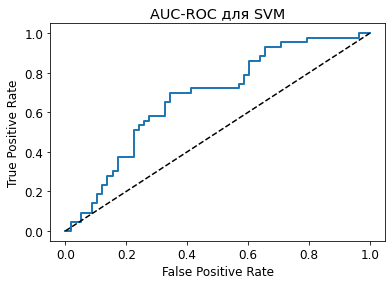

frr = 0.426
far = 0.0
eer = 0.213
accuracy = 0.574
precision = 1.0
recall = 0.574
f1 = 0.73
frr_sr = 0.332
far_sr = 0.197
eer_sr = 0.265
accuracy_sr = 0.603
precision_sr = 0.803
recall_sr = 0.668
F1_sr = 0.718


In [17]:
svm_linear(df, 1000.0)

In [18]:
def svm_poly(dataframe, C):
    frr_sr = 0.0000
    far_sr = 0.0000
    eer_sr = 0.0000
    accuracy_sr = 0.0000
    precision_sr = 0.0000
    recall_sr = 0.000
    F1_sr = 0.0000  
    for i in range(1,21):
        m=SVC(kernel='poly', C=C)
        LR = dataframe.sample(frac=1).reset_index(drop=True)
        #X = np.array(dataframe.iloc[:, :-2].values)
        X = np.array(LR[['time', 'DU', 'DU3', 'DU4', 'DU5', 'kpm5', 'kpm10',
       'skew5_time', 'skew20_time', 'skew5_kpm5', 'skew10_kpm5', 'skew5_kpm10',
       'skew10_kpm10']].values)
        y = np.array(LR['y'].values)
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20)
        m.fit(train_X,train_y)
        print(confusion_matrix(test_y, m.predict(test_X)))
        tp = confusion_matrix(test_y, m.predict(test_X))[0,0]
        fp = confusion_matrix(test_y, m.predict(test_X))[0,1]
        fn = confusion_matrix(test_y, m.predict(test_X))[1,0]
        tn = confusion_matrix(test_y, m.predict(test_X))[1,1]
        frr = fn/(tp+fn)
        frr_sr += frr
        far = fp/(tp+fp)
        far_sr += far
        eer = (frr+far)/2
        eer_sr += eer
        accuracy = (tp+tn)/(tp+tn+fp+fn)
        accuracy_sr += accuracy
        precision = tp/(tp+fp)
        precision_sr += precision
        recall = tp/(tp+fn)
        recall_sr += recall
        f1 = 2 * (precision * recall) / (precision + recall)
        F1_sr += f1
        print(i)
        print('frr = ' + str(round(frr, 3)))
        print('far = ' + str(round(far, 3)))
        print('eer = ' + str(round(eer, 3)))
        print('accuracy = ' + str(round(accuracy, 3)))
        print('precision = ' + str(round(precision, 3)))
        print('recall = ' + str(round(recall, 3)))
        print('f1 = ' + str(round(f1, 3)))
    frr_sr = frr_sr/20
    far_sr = far_sr/20
    eer_sr = eer_sr/20
    accuracy_sr = accuracy_sr/20
    precision_sr = precision_sr/20
    recall_sr = recall_sr/20
    F1_sr = F1_sr/20
    print('frr_sr = ' + str(round(frr_sr, 3)))
    print('far_sr = ' + str(round(far_sr, 3)))
    print('eer_sr = ' + str(round(eer_sr, 3)))
    print('accuracy_sr = ' + str(round(accuracy_sr, 3)))
    print('precision_sr = ' + str(round(precision_sr, 3)))
    print('recall_sr = ' + str(round(recall_sr, 3)))
    print('F1_sr = ' + str(round(F1_sr, 3)))

In [19]:
svm_poly(df, 100.0)

[[53 13]
 [14 21]]
1
frr = 0.209
far = 0.197
eer = 0.203
accuracy = 0.733
precision = 0.803
recall = 0.791
f1 = 0.797
[[50 18]
 [11 22]]
2
frr = 0.18
far = 0.265
eer = 0.223
accuracy = 0.713
precision = 0.735
recall = 0.82
f1 = 0.775
[[42 19]
 [13 27]]
3
frr = 0.236
far = 0.311
eer = 0.274
accuracy = 0.683
precision = 0.689
recall = 0.764
f1 = 0.724
[[46 20]
 [13 22]]
4
frr = 0.22
far = 0.303
eer = 0.262
accuracy = 0.673
precision = 0.697
recall = 0.78
f1 = 0.736
[[46 14]
 [20 21]]
5
frr = 0.303
far = 0.233
eer = 0.268
accuracy = 0.663
precision = 0.767
recall = 0.697
f1 = 0.73
[[48 21]
 [10 22]]
6
frr = 0.172
far = 0.304
eer = 0.238
accuracy = 0.693
precision = 0.696
recall = 0.828
f1 = 0.756
[[41 20]
 [13 27]]
7
frr = 0.241
far = 0.328
eer = 0.284
accuracy = 0.673
precision = 0.672
recall = 0.759
f1 = 0.713
[[53 18]
 [19 11]]
8
frr = 0.264
far = 0.254
eer = 0.259
accuracy = 0.634
precision = 0.746
recall = 0.736
f1 = 0.741
[[40 15]
 [20 26]]
9
frr = 0.333
far = 0.273
eer = 0.303
accu

In [20]:
svm_poly(df, 1000.0)

[[47 19]
 [17 18]]
1
frr = 0.266
far = 0.288
eer = 0.277
accuracy = 0.644
precision = 0.712
recall = 0.734
f1 = 0.723
[[43 22]
 [14 22]]
2
frr = 0.246
far = 0.338
eer = 0.292
accuracy = 0.644
precision = 0.662
recall = 0.754
f1 = 0.705
[[48 19]
 [ 9 25]]
3
frr = 0.158
far = 0.284
eer = 0.221
accuracy = 0.723
precision = 0.716
recall = 0.842
f1 = 0.774
[[45 19]
 [17 20]]
4
frr = 0.274
far = 0.297
eer = 0.286
accuracy = 0.644
precision = 0.703
recall = 0.726
f1 = 0.714
[[38 20]
 [17 26]]
5
frr = 0.309
far = 0.345
eer = 0.327
accuracy = 0.634
precision = 0.655
recall = 0.691
f1 = 0.673
[[45 16]
 [15 25]]
6
frr = 0.25
far = 0.262
eer = 0.256
accuracy = 0.693
precision = 0.738
recall = 0.75
f1 = 0.744
[[39 12]
 [24 26]]
7
frr = 0.381
far = 0.235
eer = 0.308
accuracy = 0.644
precision = 0.765
recall = 0.619
f1 = 0.684
[[50 18]
 [13 20]]
8
frr = 0.206
far = 0.265
eer = 0.236
accuracy = 0.693
precision = 0.735
recall = 0.794
f1 = 0.763
[[45 18]
 [19 19]]
9
frr = 0.297
far = 0.286
eer = 0.291
a

# DecisionTree

In [24]:
parametrs = { 
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [25]:
grid = GridSearchCV(DecisionTreeClassifier(), parametrs, cv=5)
grid.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2)})

In [26]:
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 8}

In [27]:
def DecTree(dataframe):
    frr_sr = 0.0000
    far_sr = 0.0000
    eer_sr = 0.0000
    accuracy_sr = 0.0000
    precision_sr = 0.0000
    recall_sr = 0.000
    F1_sr = 0.0000
    for i in range(1,21):
        model = DecisionTreeClassifier(criterion='gini', 
                                       max_depth=7, 
                                       min_samples_leaf=6, 
                                       min_samples_split=2, 
                                       random_state=0)
        LR = dataframe.sample(frac=1).reset_index(drop=True)
        X = np.array(LR[['time', 'DU', 'DU3', 'DU4', 'DU5', 'kpm5', 'kpm10',
       'skew5_time', 'skew20_time', 'skew5_kpm5', 'skew10_kpm5', 'skew5_kpm10',
       'skew10_kpm10']].values)
        y = np.array(LR['y'].values)
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30)
        m = model.fit(train_X, train_y)
        print(confusion_matrix(test_y, m.predict(test_X)))
        tp = confusion_matrix(test_y, m.predict(test_X))[0,0]
        fp = confusion_matrix(test_y, m.predict(test_X))[0,1]
        fn = confusion_matrix(test_y, m.predict(test_X))[1,0]
        tn = confusion_matrix(test_y, m.predict(test_X))[1,1]
        frr = fn/(tp+fn)
        frr_sr += frr
        far = fp/(tp+fp)
        far_sr += far
        eer = (frr+far)/2
        eer_sr += eer
        accuracy = (tp+tn)/(tp+tn+fp+fn)
        accuracy_sr += accuracy
        precision = tp/(tp+fp)
        precision_sr += precision
        recall = tp/(tp+fn)
        recall_sr += recall
        f1 = 2 * (precision * recall) / (precision + recall)
        F1_sr += f1
        print(i)
        print('frr = ' + str(round(frr, 3)))
        print('far = ' + str(round(far, 3)))
        print('eer = ' + str(round(eer, 3)))
        print('accuracy = ' + str(round(accuracy, 3)))
        print('precision = ' + str(round(precision, 3)))
        print('recall = ' + str(round(recall, 3)))
        print('f1 = ' + str(round(f1, 3)))
        
                # plot ROC Curve
        fpr, tpr, thresholds = roc_curve(test_y, m.predict_proba(test_X)[:,1])
        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, linewidth=2)
        plt.plot([0,1], [0,1], 'k--' )
        plt.rcParams['font.size'] = 12
        plt.title('AUC-ROC для дерева решений')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()
    frr_sr = frr_sr/20
    far_sr = far_sr/20
    eer_sr = eer_sr/20
    accuracy_sr = accuracy_sr/20
    precision_sr = precision_sr/20
    recall_sr = recall_sr/20
    F1_sr = F1_sr/20
    print('frr_sr = ' + str(round(frr_sr, 3)))
    print('far_sr = ' + str(round(far_sr, 3)))
    print('eer_sr = ' + str(round(eer_sr, 3)))
    print('accuracy_sr = ' + str(round(accuracy_sr, 3)))
    print('precision_sr = ' + str(round(precision_sr, 3)))
    print('recall_sr = ' + str(round(recall_sr, 3)))
    print('F1_sr = ' + str(round(F1_sr, 3)))

[[71 22]
 [32 26]]
1
frr = 0.311
far = 0.237
eer = 0.274
accuracy = 0.642
precision = 0.763
recall = 0.689
f1 = 0.724


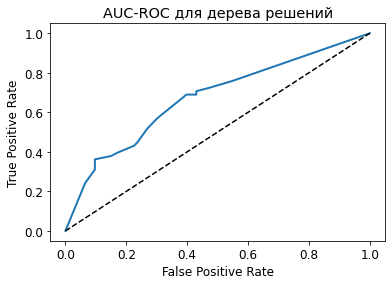

[[67 29]
 [16 39]]
2
frr = 0.193
far = 0.302
eer = 0.247
accuracy = 0.702
precision = 0.698
recall = 0.807
f1 = 0.749


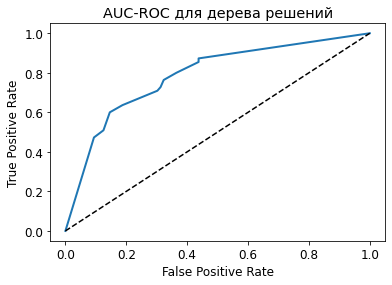

[[86 11]
 [28 26]]
3
frr = 0.246
far = 0.113
eer = 0.18
accuracy = 0.742
precision = 0.887
recall = 0.754
f1 = 0.815


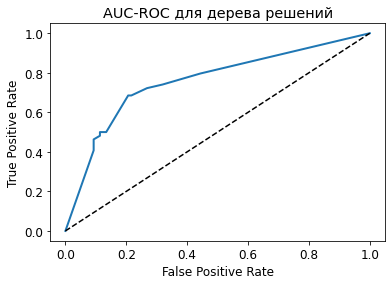

[[76 20]
 [20 35]]
4
frr = 0.208
far = 0.208
eer = 0.208
accuracy = 0.735
precision = 0.792
recall = 0.792
f1 = 0.792


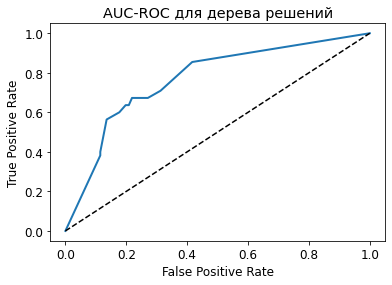

[[71 16]
 [23 41]]
5
frr = 0.245
far = 0.184
eer = 0.214
accuracy = 0.742
precision = 0.816
recall = 0.755
f1 = 0.785


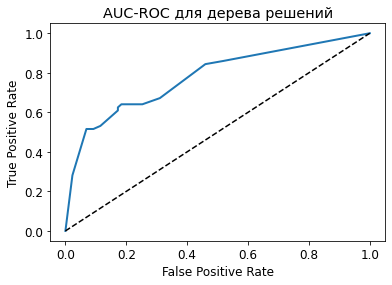

[[72 22]
 [16 41]]
6
frr = 0.182
far = 0.234
eer = 0.208
accuracy = 0.748
precision = 0.766
recall = 0.818
f1 = 0.791


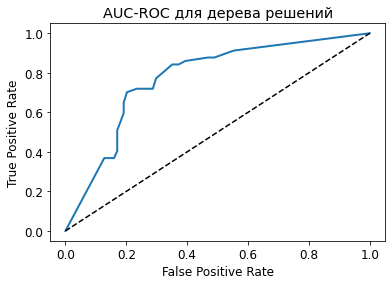

[[81 16]
 [24 30]]
7
frr = 0.229
far = 0.165
eer = 0.197
accuracy = 0.735
precision = 0.835
recall = 0.771
f1 = 0.802


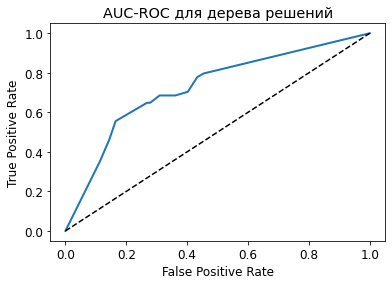

[[69 21]
 [22 39]]
8
frr = 0.242
far = 0.233
eer = 0.238
accuracy = 0.715
precision = 0.767
recall = 0.758
f1 = 0.762


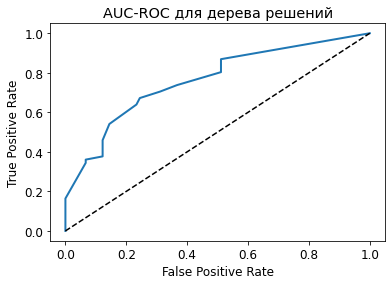

[[69 32]
 [19 31]]
9
frr = 0.216
far = 0.317
eer = 0.266
accuracy = 0.662
precision = 0.683
recall = 0.784
f1 = 0.73


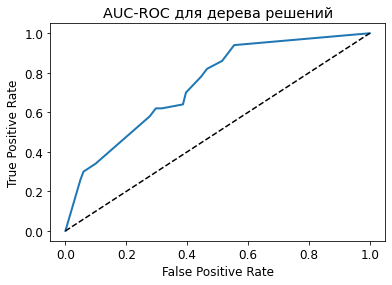

[[73 23]
 [23 32]]
10
frr = 0.24
far = 0.24
eer = 0.24
accuracy = 0.695
precision = 0.76
recall = 0.76
f1 = 0.76


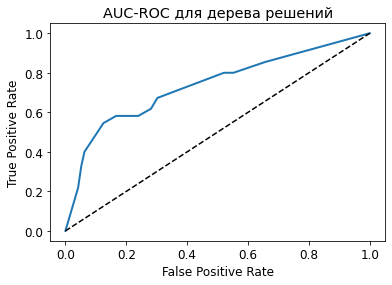

[[70 21]
 [18 42]]
11
frr = 0.205
far = 0.231
eer = 0.218
accuracy = 0.742
precision = 0.769
recall = 0.795
f1 = 0.782


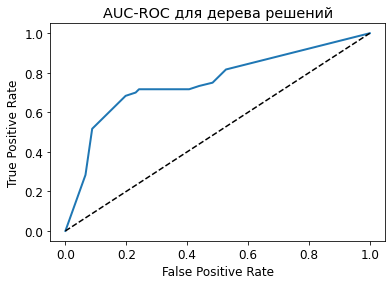

[[66 18]
 [23 44]]
12
frr = 0.258
far = 0.214
eer = 0.236
accuracy = 0.728
precision = 0.786
recall = 0.742
f1 = 0.763


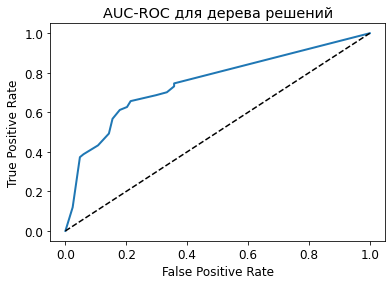

[[83  9]
 [24 35]]
13
frr = 0.224
far = 0.098
eer = 0.161
accuracy = 0.781
precision = 0.902
recall = 0.776
f1 = 0.834


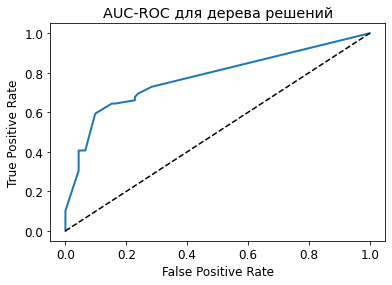

[[62 29]
 [28 32]]
14
frr = 0.311
far = 0.319
eer = 0.315
accuracy = 0.623
precision = 0.681
recall = 0.689
f1 = 0.685


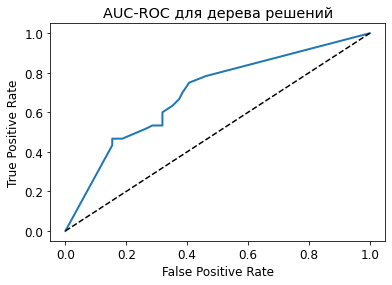

[[69 25]
 [20 37]]
15
frr = 0.225
far = 0.266
eer = 0.245
accuracy = 0.702
precision = 0.734
recall = 0.775
f1 = 0.754


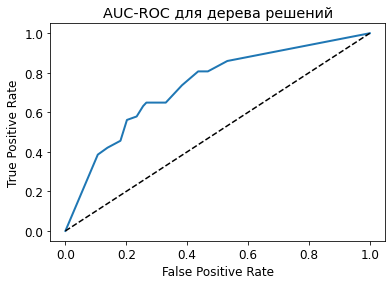

[[76 19]
 [21 35]]
16
frr = 0.216
far = 0.2
eer = 0.208
accuracy = 0.735
precision = 0.8
recall = 0.784
f1 = 0.792


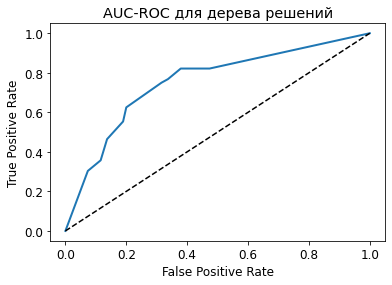

[[82 18]
 [26 25]]
17
frr = 0.241
far = 0.18
eer = 0.21
accuracy = 0.709
precision = 0.82
recall = 0.759
f1 = 0.788


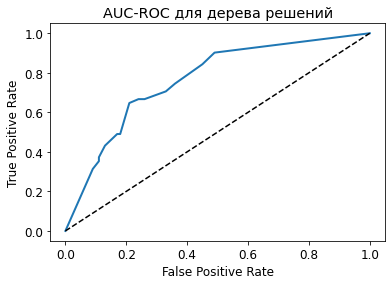

[[68 19]
 [20 44]]
18
frr = 0.227
far = 0.218
eer = 0.223
accuracy = 0.742
precision = 0.782
recall = 0.773
f1 = 0.777


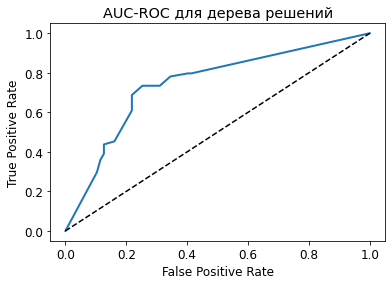

[[74 15]
 [31 31]]
19
frr = 0.295
far = 0.169
eer = 0.232
accuracy = 0.695
precision = 0.831
recall = 0.705
f1 = 0.763


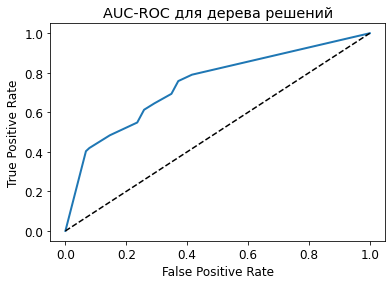

[[80 23]
 [18 30]]
20
frr = 0.184
far = 0.223
eer = 0.203
accuracy = 0.728
precision = 0.777
recall = 0.816
f1 = 0.796


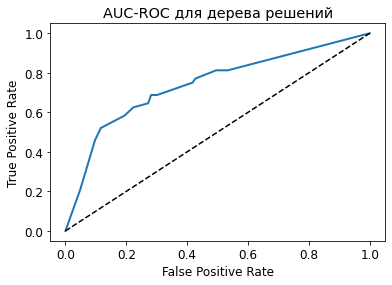

frr_sr = 0.235
far_sr = 0.218
eer_sr = 0.226
accuracy_sr = 0.715
precision_sr = 0.782
recall_sr = 0.765
F1_sr = 0.772


In [28]:
DecTree(df)